# Rain Prediction Analysis Notebook 🌧️

## Overview 📖
Welcome to our Rain Prediction Analysis Notebook! This notebook aims to explore, visualize, and model weather data to predict whether it will rain tomorrow in Australia. Through detailed data analysis and machine learning techniques, we seek to understand patterns and build a predictive model with high accuracy.

## Objectives 🎯
- **Explore the dataset**: Understand the features and distributions of weather conditions.
- **Visualize key statistics**: Use colorful and insightful plots to visualize the data in meaningful ways.
- **Preprocess data**: Prepare the data for modeling through cleaning and transformation.
- **Develop a model**: Construct a machine learning model to predict rain.
- **Evaluate the model**: Assess the performance of the model using appropriate metrics.

## Dataset 📊
The dataset used in this analysis can be found on Kaggle, provided by the [Weather Dataset Rattle Package](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package). It contains about 10 years of daily weather observations from numerous Australian weather stations.

## Tools and Libraries 🛠️
This notebook utilizes Python and its powerful libraries including:
- `Pandas` for data manipulation and analysis.
- `Matplotlib` and `Seaborn` for data visualization.
- `Keras` for building and evaluating the machine learning model.


In [2]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Let's Get Started! 🚀
We will start by loading the data, followed by an exploratory data analysis to uncover the underlying patterns and relationships. Then, we will proceed to data preprocessing, model building, and evaluation.

Prepare to dive deep into the data and discover whether we can predict rain using historical weather observations! 🌦️🔍

In [3]:
df = pd.read_csv('./weatherAUS.csv')

In [4]:
print(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1861,2014-04-04,Albury,14.9,19.6,9.0,NaN,NaN,SE,48.0,SSE,...,95.0,88.0,1019.0,1017.7,8.0,8.0,14.9,17.7,Yes,Yes
46339,2009-11-22,Canberra,17.6,30.3,0.0,5.6,NaN,NaN,NaN,NaN,...,54.0,41.0,NaN,NaN,NaN,NaN,22.9,28.2,No,No
32803,2015-07-10,Sydney,7.3,16.9,0.0,1.2,3.2,W,43.0,W,...,92.0,61.0,1022.6,1019.0,4.0,7.0,9.4,16.0,No,No


# Data Preprocessing Steps 🔄

## Handling Missing Values
To ensure the robustness of our model, we need to handle missing values within the dataset. Here's how we address them:

- **Temperature and Numerical Data**: We fill missing values for temperature-related features (`MinTemp`, `MaxTemp`, `Evaporation`, `Sunshine`, etc.) and other numerical data like wind speed and pressure with the mean of their respective columns.
- **Categorical Data**: For categorical data such as `WindGustDir`, which represents wind gust direction, we use the mode (the most frequently occurring value).
- **Consistency Across Data**: We ensure that all similar data points are treated consistently to maintain data integrity.

In [5]:
#filling Na
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['WindGustDir'].fillna(df['WindGustDir'].mode(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

#featrues adding
df["month"] = df["Date"].str[5:7]

# Drop unused columns
df.drop_duplicates(inplace=True)
df = df.drop(columns='Date')
df = df[~df['RainTomorrow'].isna()]
df = df[~df['RainToday'].isna()]

#changing types 
df['RainTomorrow'] = (df['RainTomorrow'] == 'Yes')
df['RainToday'] = (df['RainToday'] == 'Yes')




df['RainTomorrow'] = df.pop('RainTomorrow')

C:\Users\HP\AppData\Local\Temp\ipykernel_10072\2072120897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10072\2072120897.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  object 
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    140787 non-null  float64
 5   Sunshine       140787 non-null  float64
 6   WindGustDir    131624 non-null  object 
 7   WindGustSpeed  140787 non-null  float64
 8   WindDir9am     131127 non-null  object 
 9   WindDir3pm     137117 non-null  object 
 10  WindSpeed9am   140787 non-null  float64
 11  WindSpeed3pm   140787 non-null  float64
 12  Humidity9am    140787 non-null  float64
 13  Humidity3pm    140787 non-null  float64
 14  Pressure9am    140787 non-null  float64
 15  Pressure3pm    140787 non-null  float64
 16  Cloud9am       140787 non-null  float64
 17  Cloud3pm       140787 non-null  fl

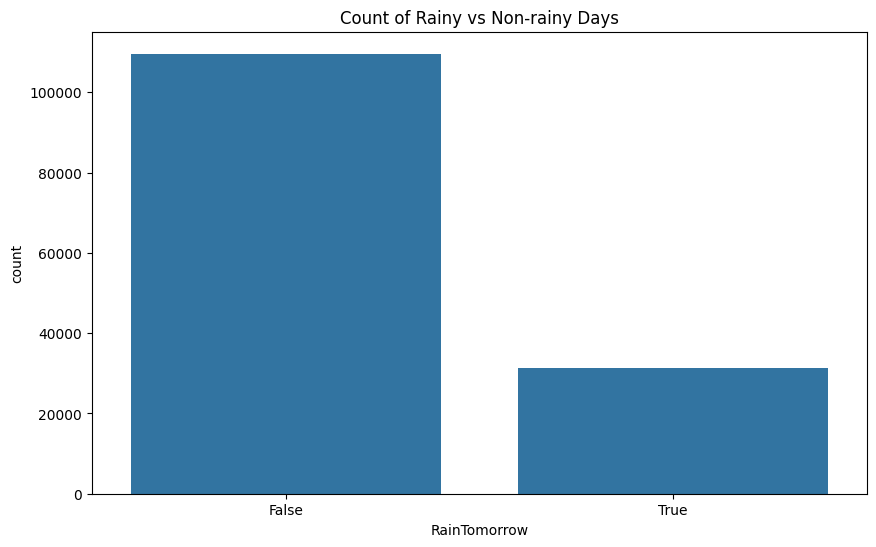

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Count of Rainy vs Non-rainy Days')
plt.show()

# Data Visualization Overview 🎨

## Introduction to Visualizations
Visualizations play a crucial role in understanding the underlying patterns and relationships within the data. In this section, we'll explore various graphical representations to gain insights into the dataset, which can help inform our modeling decisions.

C:\Users\HP\AppData\Local\Temp\ipykernel_10072\1844235381.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MaxTemp'], color='skyblue', bins=30, kde=True)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


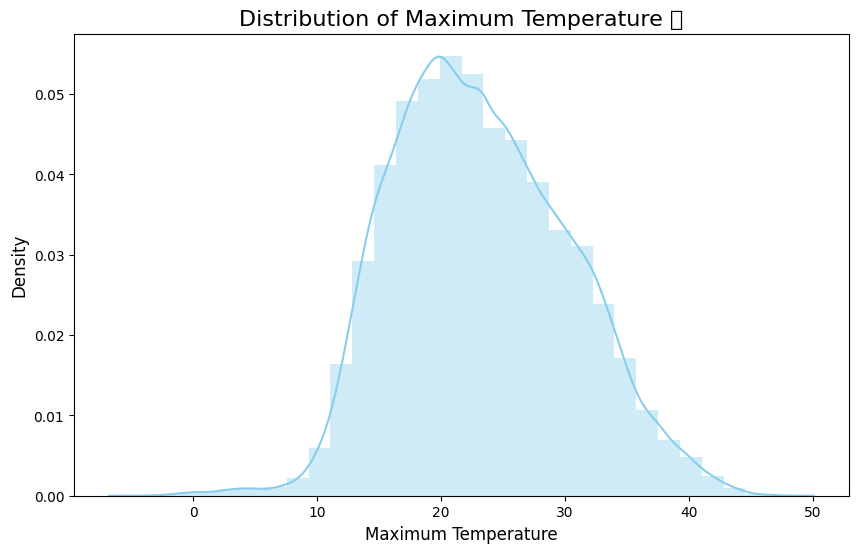

In [13]:
plt.figure(figsize=(10, 6))
sns.distplot(df['MaxTemp'], color='skyblue', bins=30, kde=True)
plt.title('Distribution of Maximum Temperature 🌡️', fontsize=16)
plt.xlabel('Maximum Temperature', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10072\2224443262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RainTomorrow', y='WindGustSpeed', data=df, palette='viridis')
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


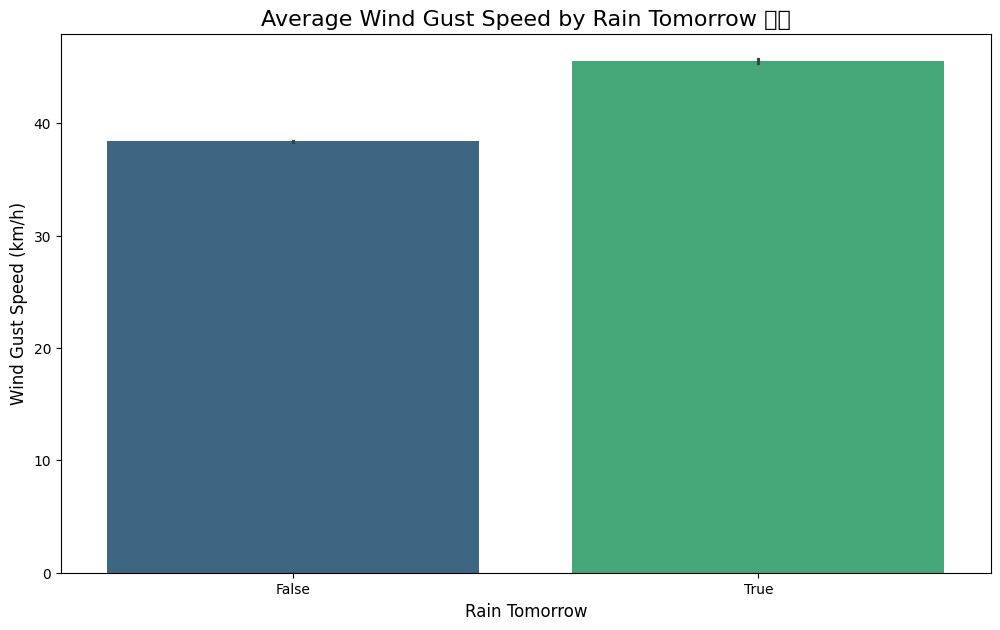

In [14]:
plt.figure(figsize=(12, 7))
sns.barplot(x='RainTomorrow', y='WindGustSpeed', data=df, palette='viridis')
plt.title('Average Wind Gust Speed by Rain Tomorrow 💨🌧️', fontsize=16)
plt.xlabel('Rain Tomorrow', fontsize=12)
plt.ylabel('Wind Gust Speed (km/h)', fontsize=12)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10072\1955144809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df, palette='pastel')
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


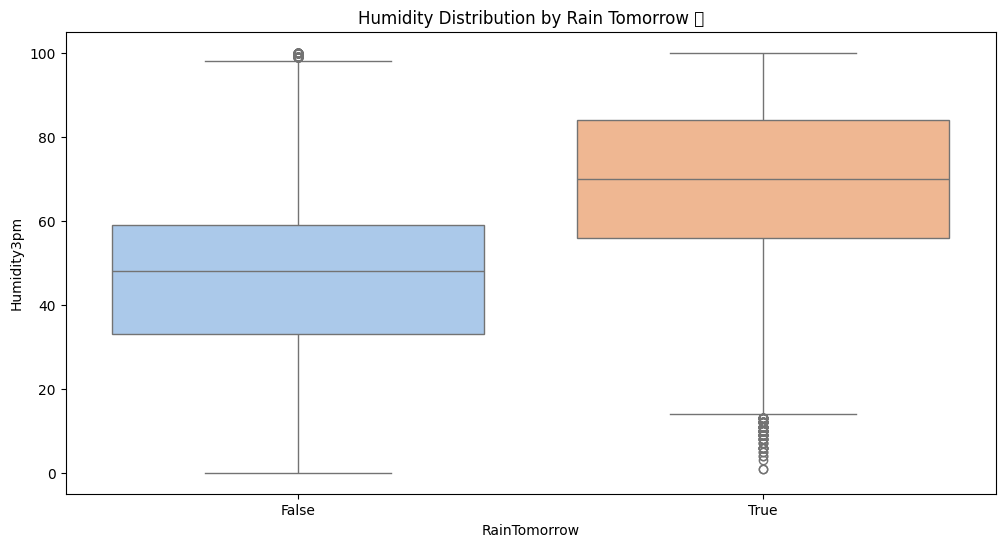

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df, palette='pastel')
plt.title('Humidity Distribution by Rain Tomorrow 🌦️')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10072\3965896001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=df, palette='bright')
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


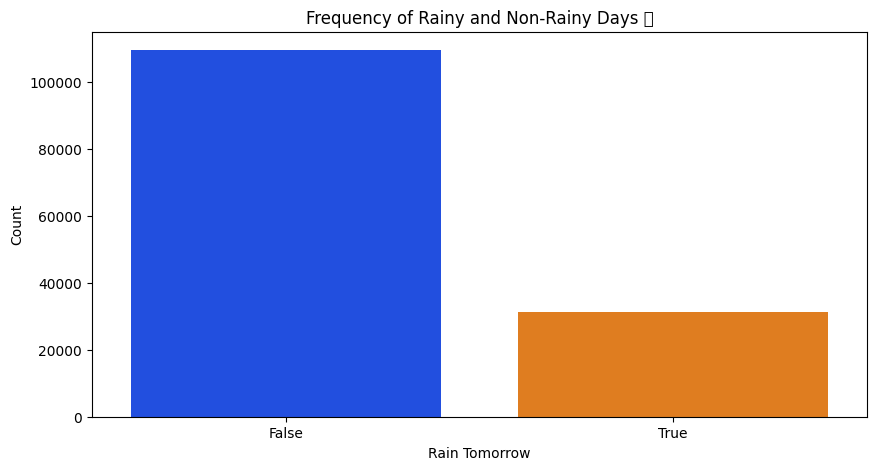

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='RainTomorrow', data=df, palette='bright')
plt.title('Frequency of Rainy and Non-Rainy Days 📈')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()

# Feature Transformation Overview 🔄

## Introduction to Feature Encoding and Scaling
Proper preparation of data before feeding it into a machine learning model is crucial. This involves encoding categorical variables and scaling numerical variables, ensuring that the model interprets the features correctly and performs optimally.

### Categorical Encoding
For categorical variables, we employ one-hot encoding, which converts each category value into a new binary column, representing the presence of each category with a 1 or 0 (True/False). This method is suitable for nominal data, where no intrinsic ordering of the categories exists.

### Numerical Feature Scaling
Numerical features are scaled to normalize their values within a particular range. This scaling is essential for algorithms that rely on distance calculations, as it ensures that all features contribute equally to the result.

## Applying Transformations
We use `ColumnTransformer` from `sklearn` to apply these transformations. It allows different transformations to be applied to specified columns of the dataset, ensuring that each feature is processed appropriately.


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

categorical = [
    'WindDir9am',
    'WindDir3pm',
    'WindGustDir',
    'Location',
    'month',
    
]
numerical = ['MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',"Humidity9am",'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

preprocessor = ColumnTransformer(
    [
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
        ('numerical', StandardScaler(), numerical),
    ],
    remainder='passthrough',
)


# Preparing the Feature Matrix and Target Vector 🎯


In [9]:
target = 'RainTomorrow'
x = preprocessor.fit_transform(df.drop(columns=[target])).astype(float)
y = df[target].values.reshape(-1,1)

# Splitting the Dataset into Training and Testing Sets 🔄


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, stratify=y)

# Dimensionality Reduction with PCA 📉

## Overview
Principal Component Analysis (PCA) is a powerful technique used for dimensionality reduction while retaining as much variance as possible. It transforms the high-dimensional data into a lower-dimensional space, which can lead to improved model performance due to reduced complexity and noise.

## Implementing PCA
We use Scikit-learn's `PCA` class to apply this technique to our dataset. Here's the rationale and methodology for our implementation:

- **Variance Retention**: We set `n_components` to 0.995, meaning that the PCA transformation will keep 99.5% of the variance. This value is a trade-off between maintaining most of the data's information and reducing the number of features.
- **Fitting PCA**: PCA is fitted only on the training data to avoid leakage of information from the test set. This ensures that the transformation is derived solely from the training data.
- **Transformation**: After fitting, the PCA transformation is applied to both the training and testing datasets to project them into the new feature space defined by the principal components.


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.995)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
(pca.explained_variance_ratio_.cumsum())

array([0.24841107, 0.39697608, 0.49282545, 0.5483638 , 0.59721288,
       0.63485323, 0.6694206 , 0.69515535, 0.71640622, 0.73636849,
       0.75271184, 0.76682073, 0.77417131, 0.77976013, 0.78492433,
       0.78979959, 0.79448213, 0.79892602, 0.80330759, 0.8075908 ,
       0.81185192, 0.81605386, 0.82011669, 0.82412618, 0.82810758,
       0.83204512, 0.83596959, 0.8398181 , 0.84360389, 0.84730423,
       0.85095563, 0.85451351, 0.85790309, 0.86126538, 0.8645507 ,
       0.8677655 , 0.87090408, 0.87402756, 0.87707318, 0.88007098,
       0.88304381, 0.88598463, 0.88887342, 0.89168089, 0.89448251,
       0.89725937, 0.89999584, 0.90267286, 0.90532446, 0.90795161,
       0.91057019, 0.91314207, 0.91568567, 0.91820349, 0.92071662,
       0.92314531, 0.92555651, 0.92795458, 0.93024297, 0.93249276,
       0.93472712, 0.93690232, 0.93906401, 0.94119446, 0.94312066,
       0.94502536, 0.94687553, 0.94866712, 0.95026828, 0.95175286,
       0.95318924, 0.95445512, 0.95559568, 0.95669602, 0.95777

In [12]:
x_train.shape

(112629, 115)

# Handling Class Imbalance with Class Weights ⚖️

## Overview
In many real-world datasets, especially in classification tasks, some classes might be underrepresented compared to others. This imbalance can lead to biased models that favor the majority class. To address this issue, we calculate class weights which are used to give more importance to underrepresented classes during model training.

## Calculating Class Weights
Here’s how class weights are calculated:

- **Counting Instances**: We first count the number of instances of each class in the training set.
- **Calculating Weights**: The weight for each class is calculated as the total number of instances divided by the product of the number of classes and the number of instances of that class. This makes the weight inversely proportional to the class frequency, giving more weight to less frequent classes.


In [13]:
classes, counts = np.unique(y_train, return_counts=True)

total_instances = len(y_train)
n_classes = len(classes)
weights = total_instances / (n_classes * counts)

class_weight = dict(zip(classes, weights))
class_weight

{False: 0.6423609526851303, True: 2.2560995152437804}

# Implementing Callbacks in Keras Model Training 🔄

## Overview
Callbacks in Keras are powerful tools that allow you to apply specific actions at various stages of the training process. They can help you monitor your model’s performance, make adjustments on the fly, and prevent overfitting. Here, we use two common callbacks: `EarlyStopping` and `ReduceLROnPlateau`.

## Callbacks Used

### 1. EarlyStopping
This callback monitors the model's validation accuracy and stops training when it stops improving, thus preventing overfitting.

- **Patience**: The number of epochs to continue training without improvement in validation accuracy. We set it to 20 epochs.
- **Restore Best Weights**: Ensures that the model's weights are reverted to those of the epoch with the best value of the monitored metric (in this case, `val_accuracy`).

### 2. ReduceLROnPlateau
Reduces the learning rate when a metric has stopped improving, which can make the model training more effective by fine-tuning the steps of convergence.

- **Monitor**: The performance metric to base the reduction on. We monitor `val_accuracy`.
- **Patience**: The number of epochs with no improvement after which learning rate will be reduced. Set to 5.
- **Factor

In [31]:
callbacks = [
    keras.callbacks.EarlyStopping(
        patience=20,  
        restore_best_weights=True,  
        monitor="val_accuracy"

    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        patience=5,
        factor=0.75,  
    )
]

In [15]:
keras.utils.clear_session()


# Neural Network Architecture 🧠

## Overview
Building an effective neural network requires careful selection of layers, activation functions, and weight initializers. In this section, we outline the construction of our model using the Keras library, focusing on optimizing each layer to enhance learning and performance.

## Model Configuration

### Activation Function and Initializer
- **Activation Function**: We use the Exponential Linear Unit (ELU) activation function for hidden layers. ELU helps to speed up learning by bringing the mean activations closer to zero, which improves the learning characteristics.
- **Kernel Initializer**: The `glorot_uniform` initializer, also known as Xavier uniform initializer, is used for weight initialization. It draws weights from a distribution that's designed to keep the scale of the inputs approximately equal to the scale of the outputs.

### Layers Structure
Our model consists of a series of densely connected (fully connected) layers with decreasing units, aiming to refine and focus features extraction as the network deepens:

1. **Input Layer**: Takes input features of shape (115,), suitable for our pre-processed data.
2. **Dense Layers**: A series of layers with units decreasing from 512 to 16 to gradually abstract higher-level features:
    - 512 units
    - 256 units
    - 128 units
    - 64 units
    - 32 units
    - 16 units
3. **Dropout Layer**: A dropout layer with a dropout rate of 0.25 is used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
4. **Output Layer**: The final layer with a single unit using a sigmoid activation function, suitable for binary classification tasks.


In [32]:

activ = "elu"
kernal_init = 'glorot_uniform'
model = keras.models.Sequential([
    keras.layers.Input(shape=(115,)),
    keras.layers.Dense(units=512, kernel_initializer=kernal_init, activation=activ),
    keras.layers.Dense(units=256, kernel_initializer=kernal_init, activation=activ),
    keras.layers.Dense(units=128, kernel_initializer=kernal_init, activation=activ),
    keras.layers.Dense(units=64, kernel_initializer=kernal_init, activation=activ),
    keras.layers.Dense(units=32, kernel_initializer=kernal_init, activation=activ),
    keras.layers.Dense(units=16, kernel_initializer=kernal_init, activation=activ),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=1, kernel_initializer=kernal_init, activation='sigmoid'),
])

# Compiling the Neural Network Model 🛠️

## Overview
Compiling the model is a critical step in preparing it for training. It involves specifying the optimizer, loss function, and metrics that will be used to gauge the model's performance.

## Configuration Details

### Optimizer
- **Optimizer**: We use the Adam optimizer, known for its effectiveness in handling sparse gradients and its adaptive learning rate capabilities.
- **Learning Rate**: Set at 0.00009, this parameter controls how much to change the model in response to the estimated error each time the model weights are updated.
- **Weight Decay**: A regularization term (0.05) that helps in avoiding overfitting by penalizing large weights.
- **Use EMA**: Exponential Moving Average (EMA) of the model parameters is used to stabilize and improve the model training convergence over epochs. The `use_ema` flag is set to `True`.
- **EMA Momentum**: Set at 0.05, this is the decay rate for the moving averages of trained parameters.

### Loss Function
- **Loss Function**: `binary_crossentropy` is used for this binary classification task. It measures the "distance" between the probability distribution output by the model and the true distribution of the labels.

### Metrics
- **Metrics**: We track 'accuracy' as a metric to measure the fraction of correctly classified samples during training and testing.


In [33]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00009, weight_decay=0.05, use_ema=True, ema_momentum=0.05),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training the Neural Network Model 🏋️‍♂️

## Overview
Training the neural network involves feeding it the data through epochs, using the specified batch size and callbacks to optimize performance and prevent overfitting. We also use a portion of the training data for validation to monitor the model's performance on unseen data during training.

## Training Configuration

### Parameters
- **Batch Size**: Set at 32, this determines the number of samples that will be propagated through the network before the model's internal parameters are updated.
- **Epochs**: The model is set to run for up to 20,000 epochs, although training may stop early if no improvement is seen in validation accuracy due to our callbacks.
- **Callbacks**: Includes `EarlyStopping` to halt training when validation accuracy ceases to improve, and `ReduceLROnPlateau` for reducing the learning rate when a plateau in validation accuracy is detected.
- **Validation Split**: Uses 20% of the training data as a validation set to provide an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters.

### Exclusion of Class Weight
- **Class Weight**: Initially considered to balance the influence of each class during training, the `class_weight` was excluded from the final model training. This decision was made because using `class_weight` resulted in a lower F1 score, indicating that it may have adversely affected the model's ability to generalize or perhaps prioritized recall over precision excessively.


In [34]:
history = model.fit(
    x_train, 
    y_train, 
    batch_size=32, 
    epochs=20000, 
    callbacks=callbacks, 
    validation_split=0.2,
    #class_weight=class_weight,
)

Epoch 1/20000
2816/2816 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8335 - loss: 0.3835 - val_accuracy: 0.8504 - val_loss: 0.3458 - learning_rate: 9.0000e-05
Epoch 2/20000
2816/2816 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8556 - loss: 0.3411 - val_accuracy: 0.8552 - val_loss: 0.3377 - learning_rate: 9.0000e-05
Epoch 3/20000
2816/2816 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8564 - loss: 0.3351 - val_accuracy: 0.8550 - val_loss: 0.3325 - learning_rate: 9.0000e-05
Epoch 4/20000
2816/2816 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8622 - loss: 0.3265 - val_accuracy: 0.8547 - val_loss: 0.3299 - learning_rate: 9.0000e-05
Epoch 5/20000
2816/2816 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8655 - loss: 0.3178 - val_accuracy: 0.8572 - val_loss: 0.3284 - learning_rate: 9.0000e-05
Epoch 6/20000
2816/2816 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8657 - loss: 0.3169 - val_accuracy: 0.8588 - val_loss: 0.3268 - learning_rate: 9.0000e-05
Epoch 7/20000
2816/2816 ━━━━━━━

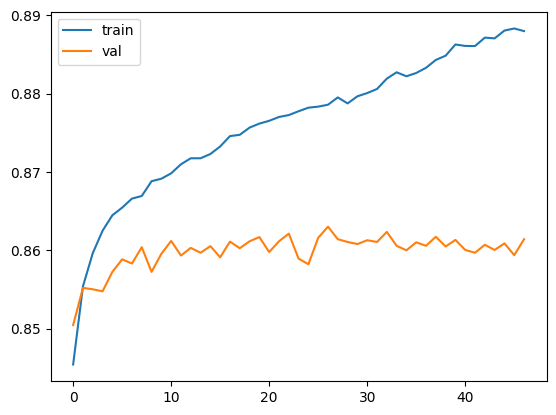

In [35]:
plt.plot(history.history["accuracy"], label='train')
plt.plot(history.history["val_accuracy"], label='val')
plt.legend()
plt.show()

# Model Evaluation on Test Data 📊

## Overview
After training the neural network, it's crucial to evaluate its performance on an unseen test dataset. This step helps determine how well the model generalizes to new data, which is essential for assessing its real-world applicability.

## Evaluating the Model
The model is evaluated using the test dataset, which was set aside during the model's training phase. The primary metric for evaluation is accuracy, which measures the proportion of correctly predicted instances.


In [36]:
test_acc = model.evaluate(x_test,y_test)
test_acc

880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8671 - loss: 0.3107


[0.31293100118637085, 0.8648696541786194]

# Conclusion
The test accuracy provides a good indication of the model's effectiveness in making predictions on new, unseen data. An accuracy of 86.71% is quite promising, suggesting that the model has learned meaningful patterns from the training data and can generalize them to other data samples. This level of accuracy also highlights areas for potential improvement, perhaps through further tuning of the model's parameters or by exploring more sophisticated modeling techniques.